In [1]:
import numpy as np
from tqdm import tqdm
import os
import math
import matplotlib.pyplot as plt
import random



file = open(os.getcwd()+'/chip.txt', 'r')

X = []
Y = []
for line in file:
    if line[-1]=='\n':
        line = line[:-1]
    line = str.split(line,",")
    sample = []
    sample.append(1)
    for i in range(len(line)-1):
        sample.append(float(line[i]))
    X.append(sample)
    Y.append(int(line[-1]))

c = list(zip(X, Y))
random.shuffle(c)
X, Y = zip(*c)
X = np.array(X)
Y = np.array(Y)
tr1 = []
tr2 = []
fa2 = []
fa1 = []

for i in range(X.shape[0]):
    if Y[i] == 1:
        tr1.append(X[i,1])
        tr2.append(X[i,2])
    else:
        fa1.append(X[i,1])
        fa2.append(X[i,2])


import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('DataSet', fontsize=20)
plt.plot(tr1, tr2, 'bo', label ='Marks')
plt.plot(fa1, fa2, 'r+', label ='Marks')
# plt.legend(loc='upper left')
fig.savefig('exam-dset.jpg')

plt.show()
print(X.shape)

<Figure size 640x480 with 1 Axes>

(118, 3)


In [2]:
dup = np.multiply(X[:,1], X[:,2])
print(dup.shape)
X = np.square(X)
X = np.c_[X, dup]
print(X[0])
tot = X.shape[0]
split = int(tot*.7)
Xtest = X[split:]
X = X[:split]
Ytest = Y[split:]
Y = Y[:split]
print(X.shape)
print(Xtest.shape)




(118,)
[ 1.          0.28024318  0.27164944 -0.27591286]
(82, 4)
(36, 4)


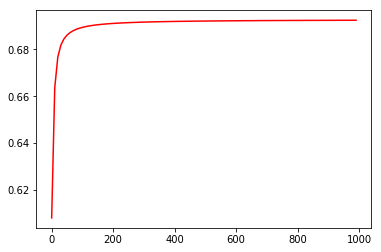

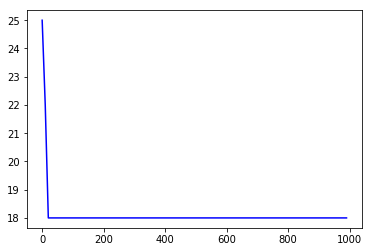

In [3]:
err = []
ep = []
err1 = []  
for k in range(0,1000,10):
    
    w = []
    for i in range(X.shape[1]):
        w.append(0)
    W = np.array(w)
    lam = []
    for i in range(W.shape[0]):
        if i==0:
            lam.append(0)
        else:
            lam.append(k)
    lam = np.array(lam)
    
   
    epochs = 1
    alpha = 0.003

    m = X.shape[0]
    while epochs<=10000:
        hx = X.dot(W)
        hx = np.exp(-hx)
        hx = 1 / (1 + hx)
        dif = hx - Y
        der = (X.T).dot(dif)
        der = der / (X.shape[0])
        for i in range(W.shape[0]):
            W[i] = (1 - (alpha*lam[i])/m)*W[i]
        W = W - (alpha * der)
        epochs+=1
    error = 0
    hx = X.dot(W)
    hx = np.exp(-hx)
    hx = 1 / ( 1 + hx)
    for i in range(X.shape[0]):
        if Y[i]==0:
            error+=math.log(1-hx[i])
        else:
            error+=math.log(hx[i])
    error/=X.shape[0]
    error *=-1
    
    count = 0
    hx = Xtest.dot(W)
    hx = np.exp(-hx)
    hx = 1 / ( 1 + hx)
    count = 0
    for i in range(Xtest.shape[0]):
        if round(hx[i])==Ytest[i]:
            count +=1
#     count = count / Xtest.shape[0]
    err1.append(count)
    err.append(error)
    ep.append(k)

plt.plot(ep, err, 'r')
plt.show()
plt.plot(ep, err1, 'b')
plt.show()

In [4]:
print(max(err1))
hx = Xtest.dot(W)
hx = np.exp(-hx)
hx = 1 / ( 1 + hx)
count = 0
for i in range(Xtest.shape[0]):
    if round(hx[i])==Ytest[i]:
        count +=1
print(count, Ytest.shape[0])

25
18 36
